<a href="https://colab.research.google.com/github/JulioCSR/Aprendendo/blob/master/Curso_de_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA - Gorjetas

###Importando base de dados

In [8]:
import pandas as pd

In [9]:
pd.read_csv('/content/drive/MyDrive/Alura/Data Science/tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [10]:
dados = pd.read_csv('/content/drive/MyDrive/Alura/Data Science/tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


###Tradução

In [11]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [12]:
renomear = {
    'total_bill': 'Valor_da_conta',
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_da_semana'
}

In [13]:
gorjetas = dados.rename(columns = renomear)
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [14]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
sim_nao = {
    'No':'Não',
    'Yes': 'Sim'
}

In [16]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [17]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [18]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sabado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

In [19]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'

}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [23]:
import seaborn as sns

###Análise 1 - valor da conta e gorjeta

In [24]:
gorjetas.columns

Index(['Valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_da_semana'],
      dtype='object')

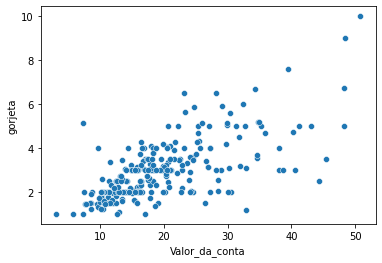

In [25]:
valor_da_gorjeta = sns.scatterplot(x='Valor_da_conta', y = 'gorjeta', data =gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme o valor da conta aumenta.**

In [26]:
print('A base dados contém {} registros. \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base dados contém 244 registros. 

Registros não nulos


Valor_da_conta     244
gorjeta            244
sobremesa          244
dia_da_semana      244
hora_do_dia        244
total_da_semana    244
dtype: int64

###Criar o campo porcentagem

In [27]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [28]:
gorjetas['porcentagem']= gorjetas['gorjeta'] / gorjetas['Valor_da_conta']
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [29]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


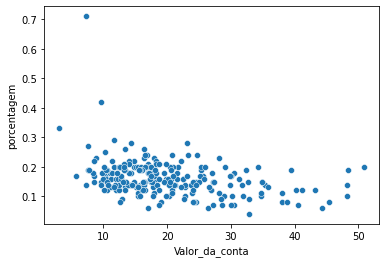

In [30]:
porcentagem_conta = sns.scatterplot(x ='Valor_da_conta', y= 'porcentagem', data= gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

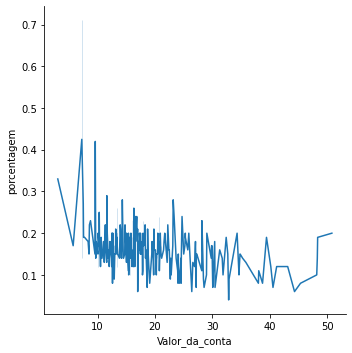

In [31]:
porcentagem_conta_linha =sns.relplot(x='Valor_da_conta', y= 'porcentagem', kind= 'line', data=gorjetas)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


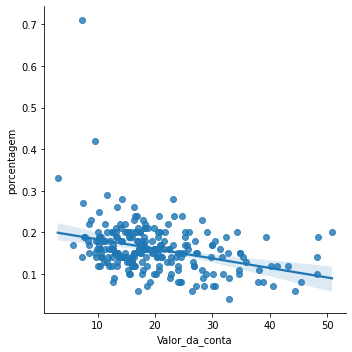

In [32]:
sns.lmplot('Valor_da_conta', y='porcentagem', data=gorjetas)

#Analise 2 - Sobremesa

In [33]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [34]:
gorjetas[gorjetas.sobremesa == "Sim"].describe()

,Valor_da_conta,gorjeta,total_da_semana,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [35]:
gorjetas[gorjetas.sobremesa == "Não"].describe()

,Valor_da_conta,gorjeta,total_da_semana,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


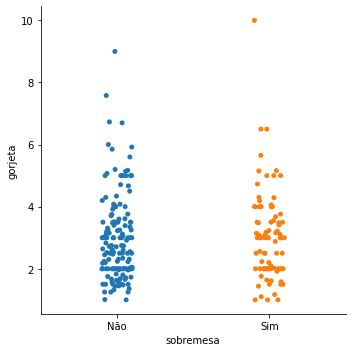

In [36]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

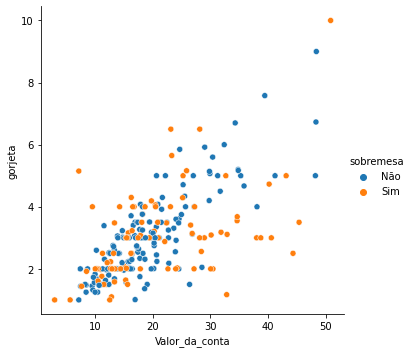

In [37]:
sns.relplot(x='Valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

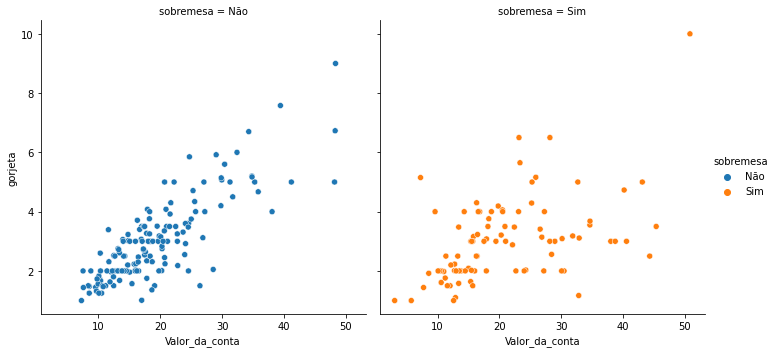

In [38]:
sns.relplot(x='Valor_da_conta', y='gorjeta', hue='sobremesa',col='sobremesa', data=gorjetas)

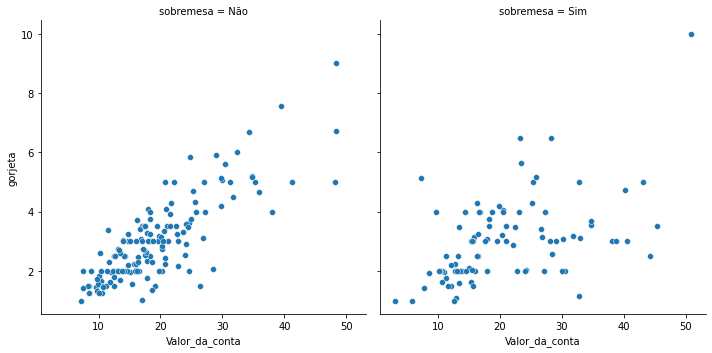

In [39]:
sns.relplot(x='Valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

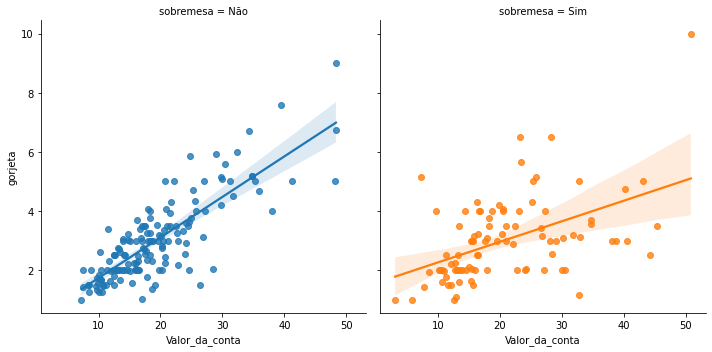

In [40]:
sns.lmplot(x='Valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

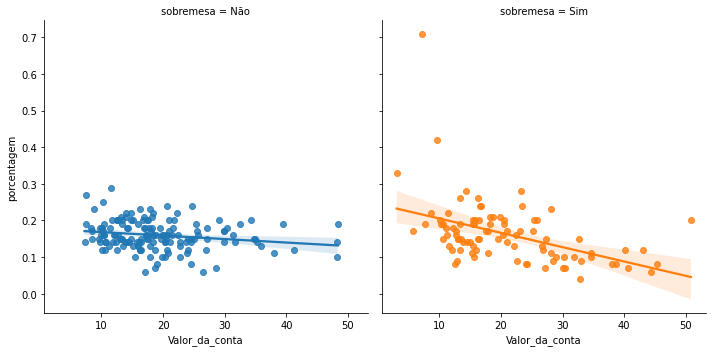

In [41]:
sns.lmplot(x='Valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

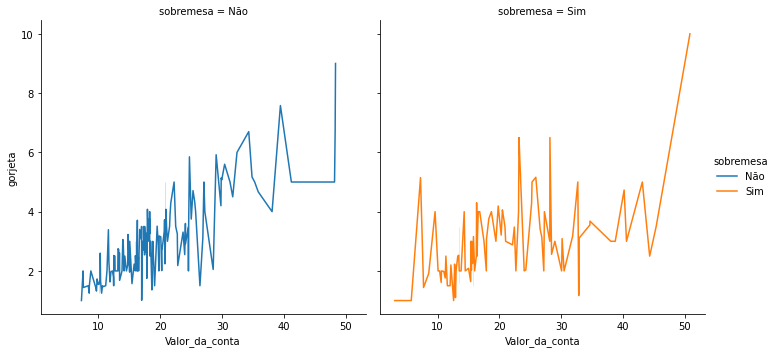

In [42]:
sns.relplot(x='Valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

**Visualmente, parece que existe uma diferença na gorjeta dependendo se a sobremesa é pedida ou não.**

##Teste de hipotese

**H<sup>null</sup>**

*A distribuição da taxa da gorjeta é a mesma nos dois grupos*

**H<sup>alt</sup>**

*A distribuição da taxa da gorjeta não é a mesma nos dois grupos*


In [43]:
from scipy.stats import ranksums

In [44]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [45]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [46]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

*A distribuição da taxa da gorjeta é a mesma nos dois grupos*

In [47]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [48]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

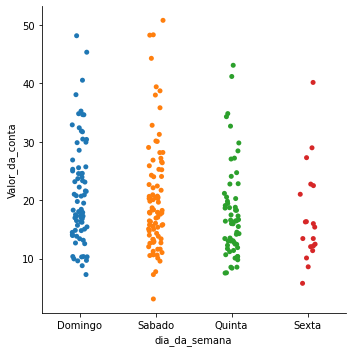

In [49]:
sns.catplot(x='dia_da_semana', y='Valor_da_conta',data=gorjetas)

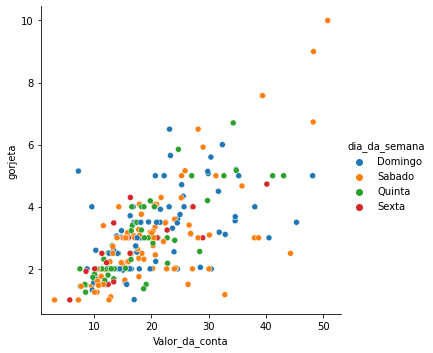

In [50]:
sns.relplot(x='Valor_da_conta', y= 'gorjeta',hue='dia_da_semana', data =gorjetas)

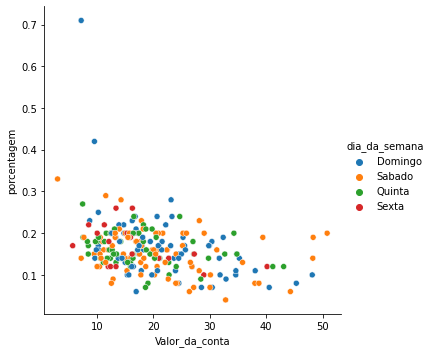

In [51]:
sns.relplot(x='Valor_da_conta', y= 'porcentagem',hue='dia_da_semana', data =gorjetas)

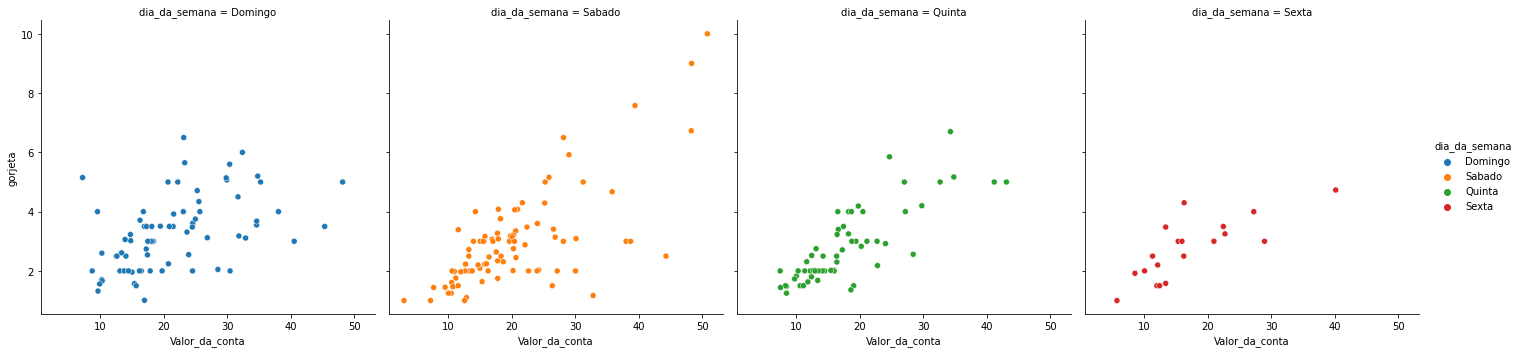

In [53]:
sns.relplot(x='Valor_da_conta', y= 'gorjeta',hue='dia_da_semana', col = 'dia_da_semana',data =gorjetas)

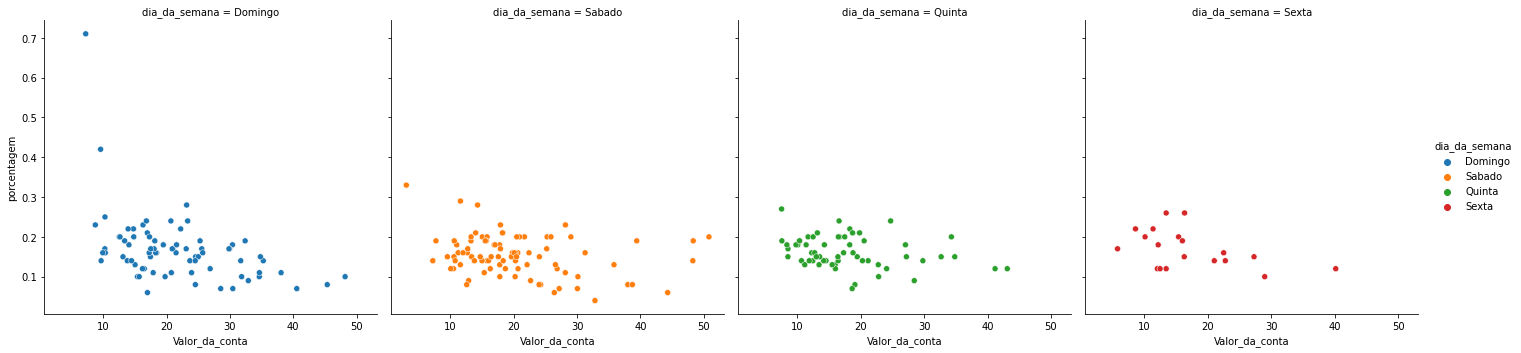

In [54]:
sns.relplot(x='Valor_da_conta', y= 'porcentagem',hue='dia_da_semana', col = 'dia_da_semana',data =gorjetas)

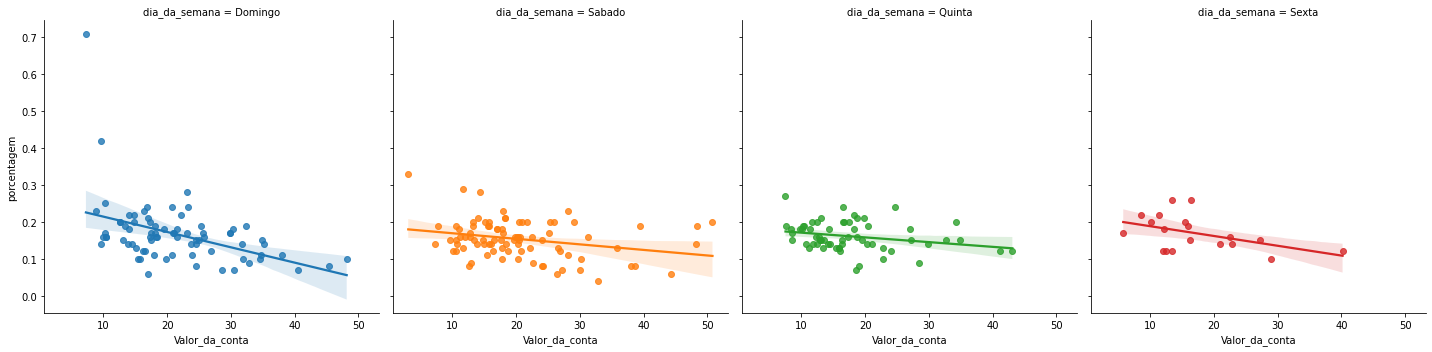

In [55]:
sns.lmplot(x='Valor_da_conta', y= 'porcentagem',hue='dia_da_semana', col = 'dia_da_semana',data =gorjetas)

In [59]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [62]:
gorjetas.groupby(['dia_da_semana']).mean()[['Valor_da_conta','gorjeta','porcentagem']]

,Valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [64]:
print('Frequencia dos dias')
gorjetas.dia_da_semana.value_counts()

Frequencia dos dias


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

##Teste de hipotese

**H<sup>null</sup>**

*A distribuição do valor da conta é igual no sabado e no domingo*

**H<sup>alt</sup>**

*A distribuição do valor da conta não é igual no sabado e no domingo*

In [65]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").Valor_da_conta

In [66]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").Valor_da_conta

In [70]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print('Valor do p-value é {}'.format(r2.pvalue))

Valor do p-value é 0.3576728477868443


**H<sup>null</sup>**

*A distribuição do valor da conta é igual no sabado e no domingo*

#Análise - 4

In [73]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


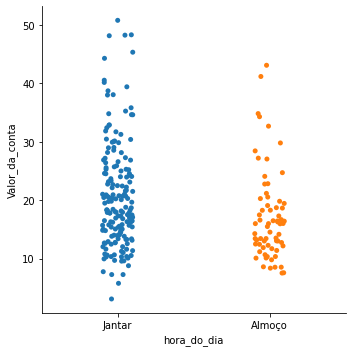

In [76]:
sns.catplot(x='hora_do_dia', y= 'Valor_da_conta',data= gorjetas)

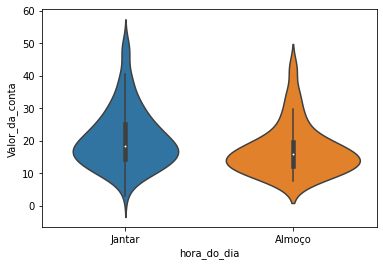

In [77]:
sns.violinplot(x = 'hora_do_dia', y = 'Valor_da_conta', data= gorjetas)

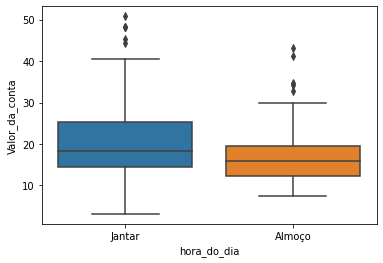

In [78]:
sns.boxplot(x='hora_do_dia', y='Valor_da_conta',data= gorjetas)

In [81]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").Valor_da_conta

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


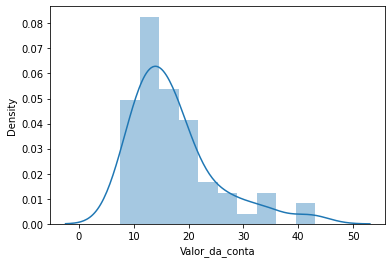

In [82]:
sns.distplot(almoco)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


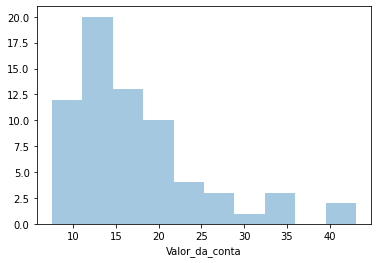

In [83]:
sns.distplot(almoco,kde=False)

In [84]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").Valor_da_conta

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


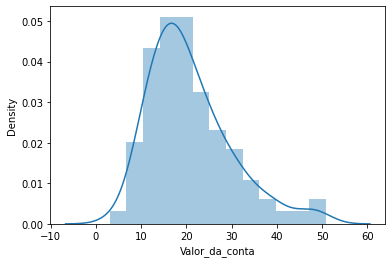

In [85]:
sns.distplot(jantar)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


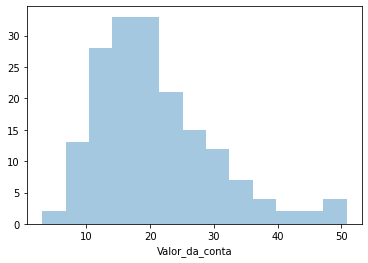

In [86]:
sns.distplot(jantar,kde=False)

In [89]:
gorjetas.groupby(['hora_do_dia']).mean()[['Valor_da_conta','gorjeta','porcentagem']]

,Valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


##Teste de Hipotese

**H<sup>null</sup>**

*A distribuição do valor da conta é igual no Jantar e no Almoço*

**H<sup>alt</sup>**

*A distribuição do valor da conta não é igual no Jantar e no Almoço*

In [91]:
r2 = ranksums(jantar,almoco)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0011791039723641672


**H<sup>alt</sup>**

*A distribuição do valor da conta não é igual no Jantar e no Almoço*

##teste de hipotese

**H<sup>null</sup>**

*A distribuição da taxa da gorjeta é igual no Jantar e no Almoço*

**H<sup>alt</sup>**

*A distribuição a taxa da gorjeta não é igual no Jantar e no Almoço*

In [93]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [94]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [95]:
r2 = ranksums(porcentagem_jantar,porcentagem_almoco)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.2602493995587126


**H<sup>null</sup>**

*A distribuição da taxa da gorjeta é igual no Jantar e no Almoço*


#projeto final

In [96]:
dados_atualizado = pd.read_csv('/content/drive/MyDrive/Alura/Data Science/tips_atualizado.csv')
dados_atualizado.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [97]:
dados_atualizado.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [98]:
renomear_atualizado = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_da_semana'
}

In [99]:
gorjetas_atualizado= dados_atualizado.rename(columns = renomear_atualizado)
gorjetas_atualizado.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_da_semana
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
